## Mapping the Definitions and Methodological Approaches of Pattern Completion: A Scoping Review Across Human and Rodent Memory Experiments

1. Theoretical definition synthesis

In [1]:
#Import the necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
import re
import string
# NEW: Import the WordNetLemmatizer from NLTK
from nltk.stem import WordNetLemmatizer

# Basic stopword list (you can expand this)
custom_stopwords = {
    'the', 'and', 'a', 'an', 'of', 'in', 'on', 'to', 'with', 'is', 'was',
    'for', 'that', 'this', 'from', 'as', 'by', 'are', 'at', 'be', 'or', 'it',
    'its', 'which', 'can', 'such', 'if', 'then', 'into', 'may'
}

# NEW: Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Cleans text by:
    - Lowercasing
    - Removing punctuation
    - Normalizing whitespace
    - Lemmatizing nouns (to handle plurals)
    - Removing basic stopwords
    """
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # normalize whitespace
    tokens = text.split()

    # NEW: Lemmatize each word, treating it as a noun ('n') to handle plurals
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='n') for word in tokens]
    
    # Filter stopwords from the lemmatized tokens
    filtered_tokens = [word for word in lemmatized_tokens if word not in custom_stopwords]
    
    return ' '.join(filtered_tokens)


# --- Example Usage ---

# Your original script would have kept "apples" and "oranges"
original_text = "These apples and oranges are for the pies."

cleaned_text = clean_text(original_text)

print(f"Original Text: '{original_text}'")
print(f"Cleaned Text:  '{cleaned_text}'")

# Example Output:
# Original Text: 'These apples and oranges are for the pies.'
# Cleaned Text:  'these apple orange pie'

Original Text: 'These apples and oranges are for the pies.'
Cleaned Text:  'these apple orange pie'


In [4]:
#load the human dataset and prepare the format

human_data = pd.read_excel('Review_Tables.xlsx', sheet_name='Human_study')
human_data.head(5)

#keep only Title and Theoretical definition columns
human_data = human_data[['Title', 'Theoretical definition']]
#rename column for easier access
human_data = human_data.rename(columns={'Theoretical definition': 'Definition'})
human_data['Type'] = 'Human_Study'

#load the rodent dataset and prepare the format
rodent_data = pd.read_excel('Review_Tables.xlsx', sheet_name='Rodent_study')
#keep only Title and Theoretical definition columns
rodent_data = rodent_data[['Title', 'Theoretical definition']]
#rename column for easier access
rodent_data = rodent_data.rename(columns={'Theoretical definition': 'Definition'})
rodent_data['Type'] = 'Rodent_Study'

#merge the two datasets
all_data = pd.concat([human_data, rodent_data], ignore_index=True)

#drop title duplicates
all_data = all_data.drop_duplicates(subset=['Title'])



In [5]:
#clean the text in the Definition column with lambda function
all_data['Cleaned_Definition'] = all_data['Definition'].apply(lambda x: clean_text(str(x)))

# STEP 2: Tokenize the cleaned text
all_data['tokens'] = all_data['Cleaned_Definition'].astype(str).apply(lambda x: x.split())




In [6]:
from collections import Counter

# Group tokens by study type
human_tokens = all_data[all_data['Type'] == 'Human_Study']['tokens']
rodent_tokens = all_data[all_data['Type'] == 'Rodent_Study']['tokens']

# Flatten tokens into a single list
human_all = [token for tokens in human_tokens for token in tokens]
rodent_all = [token for tokens in rodent_tokens for token in tokens]

# Get top N tokens
human_freq = Counter(human_all).most_common(50)
rodent_freq = Counter(rodent_all).most_common(50)



In [7]:
#extract a dataframe with both human and rodent frequencies containing all tokens
human_df = pd.DataFrame(human_freq, columns=['Token', 'Frequency'])
rodent_df = pd.DataFrame(rodent_freq, columns=['Token', 'Frequency'])
# Add a column to indicate the type of study
human_df['Type'] = 'Human_Study'
rodent_df['Type'] = 'Rodent_Study'
# Concatenate the two dataframes
token_df = pd.concat([human_df, rodent_df], ignore_index=True)
#export the token_df to a csv file
token_df.to_csv('All_Tokens.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'All_Tokens.csv'

C:\Users\Admin\AppData\Local\Temp\ipykernel_11792\152295912.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="crest")


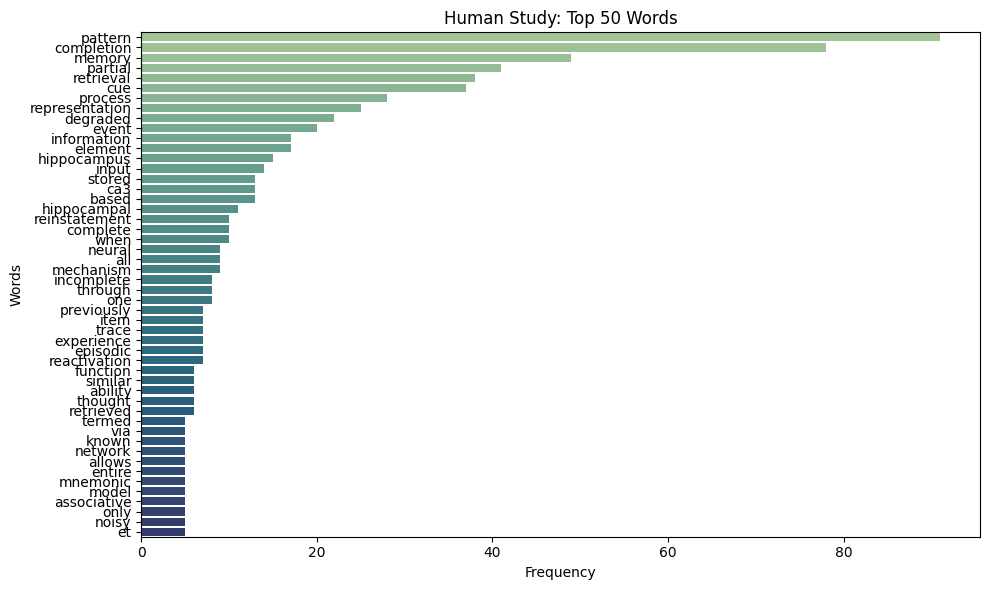

C:\Users\Admin\AppData\Local\Temp\ipykernel_11792\152295912.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="crest")


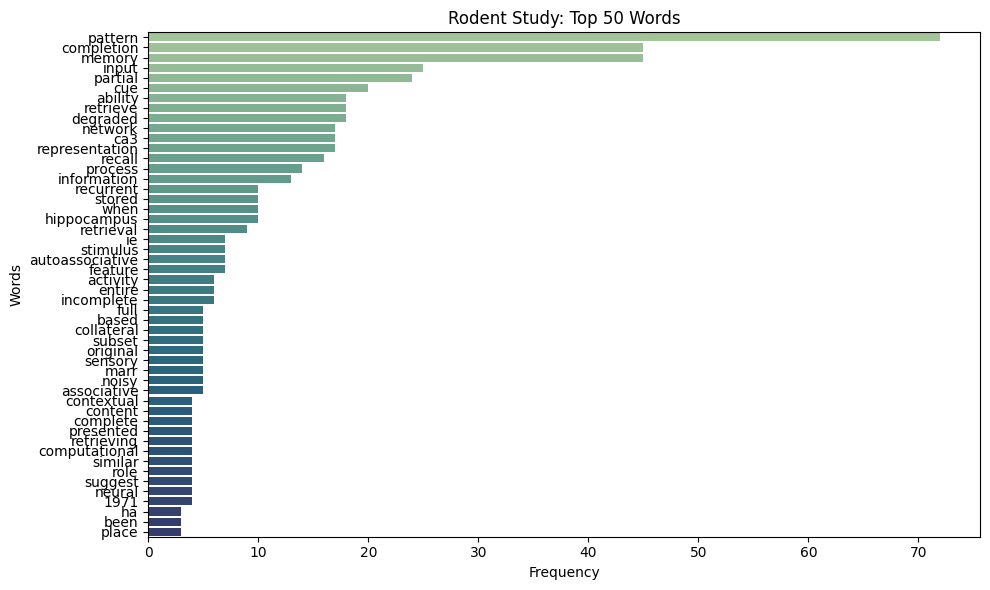

In [ ]:


def plot_bar(freq_list, title):
    words, counts = zip(*freq_list)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette="crest")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_bar(human_freq, "Human Study: Top 50 Words")
plot_bar(rodent_freq, "Rodent Study: Top 50 Words")




Semantic Embedding of Definitions 

In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nl

True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# You might need to download these first
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # --- ADD THIS CHECK ---
    # If the value is not a string (e.g., it's a NaN float), return an empty string.
    if not isinstance(text, str):
        return ""
    # ----------------------

    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    # Lemmatize and remove stopwords
    lemmas = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(lemmas)


all_data['Cleaned_Definition'] = all_data['Definition'].apply(clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top bigrams in Human literature: [('pattern completion', np.int64(77)), ('partial cue', np.int64(15)), ('partial degraded', np.int64(15)), ('completion process', np.int64(11)), ('degraded cue', np.int64(8)), ('memory representation', np.int64(7)), ('degraded input', np.int64(7)), ('previously stored', np.int64(6)), ('retrieval cue', np.int64(6)), ('hippocampal pattern', np.int64(6))]
Top bigrams in Rodent literature: [('pattern completion', np.int64(47)), ('ability retrieve', np.int64(12)), ('partial degraded', np.int64(12)), ('completion ability', np.int64(11)), ('input pattern', np.int64(8)), ('degraded input', np.int64(6)), ('recurrent collateral', np.int64(5)), ('partial cue', np.int64(5)), ('retrieve stored', np.int64(5)), ('memory representation', np.int64(5))]


C:\Users\Admin\AppData\Local\Temp\ipykernel_18064\2566530647.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="crest")


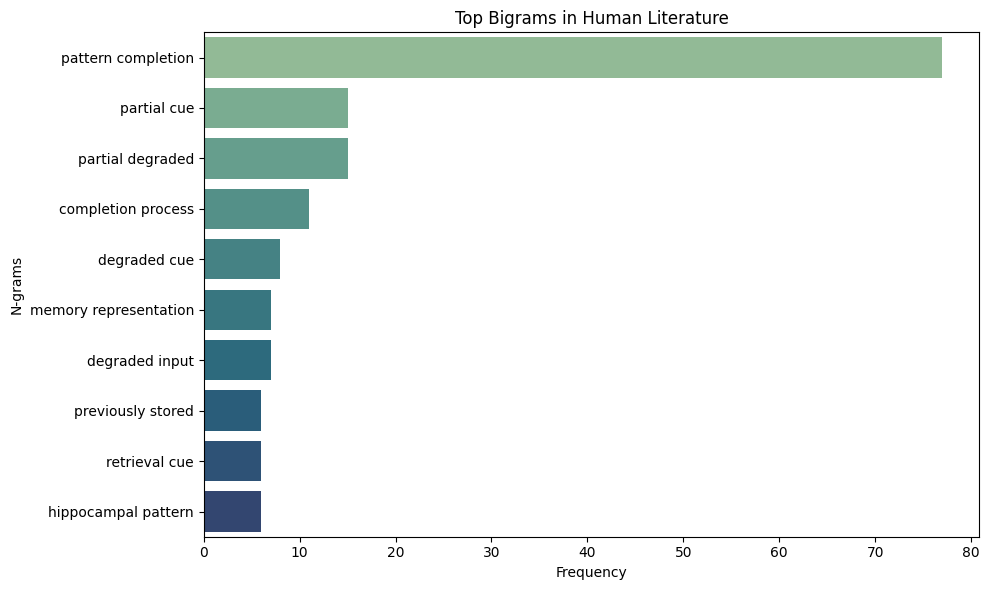

C:\Users\Admin\AppData\Local\Temp\ipykernel_18064\2566530647.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="crest")


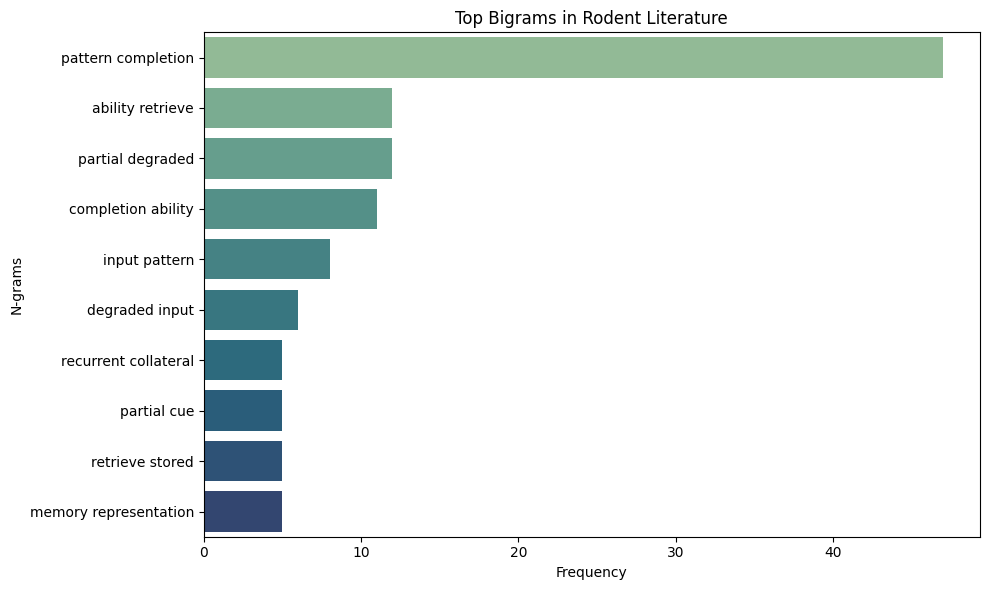

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract top n n-grams
def get_top_ngrams(corpus, ngram_range=(1, 1), n=10):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Assuming `all_data` DataFrame is already defined
# Prepare corpora as lists of strings
human_corpus = all_data[all_data['Type'] == 'Human_Study']['Cleaned_Definition'].dropna().tolist()
rodent_corpus = all_data[all_data['Type'] == 'Rodent_Study']['Cleaned_Definition'].dropna().tolist()

# Get top bigrams
human_bigrams = get_top_ngrams(human_corpus, ngram_range=(2, 2))
rodent_bigrams = get_top_ngrams(rodent_corpus, ngram_range=(2, 2))

print("Top bigrams in Human literature:", human_bigrams)
print("Top bigrams in Rodent literature:", rodent_bigrams)

# Plotting function
def plot_top_ngrams(ngrams, title):
    words, counts = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette="crest")
    plt.xlabel("Frequency")
    plt.ylabel("N-grams")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot results
plot_top_ngrams(human_bigrams, "Top Bigrams in Human Literature")
plot_top_ngrams(rodent_bigrams, "Top Bigrams in Rodent Literature")

# Create DataFrame and export
human_df = pd.DataFrame(human_bigrams, columns=['Bigram', 'Frequency'])
human_df['Type'] = 'Human_Study'

rodent_df = pd.DataFrame(rodent_bigrams, columns=['Bigram', 'Frequency'])
rodent_df['Type'] = 'Rodent_Study'

bigram_df = pd.concat([human_df, rodent_df], ignore_index=True)
bigram_df.to_csv('Bigram_Frequencies.csv', index=False)


EMBEDING DATA

In [ ]:
# Create a new DataFrame with one token per row and its corresponding definition
token_definition_rows = []
for idx, row in all_data.iterrows():
    definition = row['Definition']
    tokens = row['tokens']
    if isinstance(tokens, list):
        for token in tokens:
            token_definition_rows.append({'Token': token, 'Definition': definition})

token_definition_df = pd.DataFrame(token_definition_rows)
token_definition_df.head()



,Token,Definition
0,pattern,...pattern completion process that drives the ...
1,completion,...pattern completion process that drives the ...
2,process,...pattern completion process that drives the ...
3,drive,...pattern completion process that drives the ...
4,reinstatement,...pattern completion process that drives the ...


Number of tokens: 26
Embedding dimension: 384

Clustering Results:
Cluster 0: ['cat', 'dog', 'puppy', 'kitten', 'animal', 'pet']
Cluster 3: ['car', 'truck', 'automobile', 'vehicle', 'drive']
Cluster 1: ['apple', 'computer', 'laptop', 'keyboard', 'mouse', 'technology']
Cluster 4: ['banana', 'orange', 'fruit', 'food']
Cluster 2: ['doctor', 'nurse', 'hospital', 'patient', 'medicine']


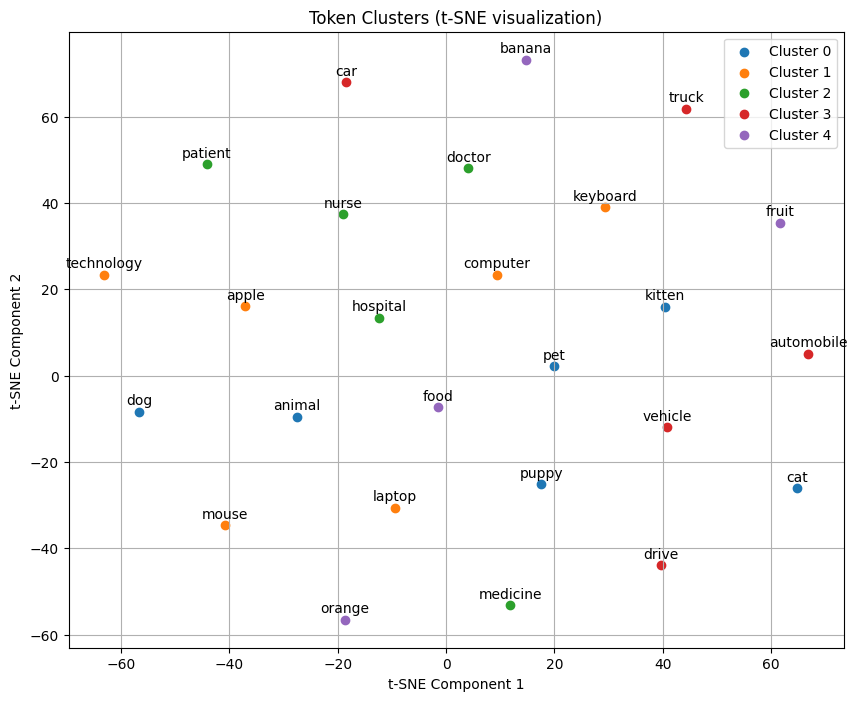

In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# 1. Your list of tokens
tokens = [
    "cat", "dog", "puppy", "kitten", "animal", "pet",
    "car", "truck", "automobile", "vehicle", "drive",
    "apple", "banana", "orange", "fruit", "food",
    "computer", "laptop", "keyboard", "mouse", "technology",
    "doctor", "nurse", "hospital", "patient", "medicine"
]

# 2. Generate Word Embeddings (using Sentence-BERT for simplicity and good performance)
# You might choose a different model based on your needs.
# 'all-MiniLM-L6-v2' is a good general-purpose model.
model = SentenceTransformer('all-MiniLM-L6-v2')
word_embeddings = model.encode(tokens)

print(f"Number of tokens: {len(tokens)}")
print(f"Embedding dimension: {word_embeddings.shape[1]}")

# 3. Apply Clustering Algorithm (K-Means)
# You need to estimate 'n_clusters' or use a method to find optimal k.
# For this small example, we can guess a reasonable number of clusters.
num_clusters = 5 # Based on our example tokens, we expect 5 main categories

kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(word_embeddings)

# 4. Group tokens by cluster
clustered_tokens = {}
for i, label in enumerate(cluster_labels):
    if label not in clustered_tokens:
        clustered_tokens[label] = []
    clustered_tokens[label].append(tokens[i])

print("\nClustering Results:")
for cluster_id, words_in_cluster in clustered_tokens.items():
    print(f"Cluster {cluster_id}: {words_in_cluster}")

# 5. Optional: Visualize Clusters (using t-SNE for dimensionality reduction)
# Reduce to 2 dimensions for plotting
pca = PCA(n_components=22) # First reduce to a reasonable number of components
reduced_embeddings = pca.fit_transform(word_embeddings)

tsne = TSNE(n_components=2, random_state=42, perplexity=min(len(tokens)-1, 30)) # Perplexity should be < num_samples
tsne_embeddings = tsne.fit_transform(reduced_embeddings)

plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = tsne_embeddings[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
    # Annotate points with token names
    for j, (x, y) in enumerate(cluster_points):
        plt.annotate(tokens[np.where(cluster_labels == i)[0][j]], (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Token Clusters (t-SNE visualization)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

Number of tokens: 100
Embedding dimension: 384

Clustering Results:
Cluster 2: ['pattern', 'representation', 'hippocampus', 'input', 'hippocampal', 'neural', 'mechanism', 'episodic', 'function', 'termed', 'network', 'mnemonic', 'model', 'associative', 'pattern', 'input', 'network', 'representation', 'recurrent', 'hippocampus', 'stimulus', 'autoassociative', 'feature', 'activity', 'sensory', 'associative', 'contextual', 'computational', 'neural']
Cluster 0: ['completion', 'partial', 'complete', 'incomplete', 'via', 'completion', 'partial', 'incomplete', 'collateral', 'complete', 'suggest']
Cluster 1: ['memory', 'retrieval', 'information', 'stored', 'reinstatement', 'reactivation', 'retrieved', 'memory', 'retrieve', 'recall', 'information', 'stored', 'retrieval', 'ie', 'subset', 'content', 'retrieving', 'place']
Cluster 3: ['cue', 'degraded', 'based', 'when', 'previously', 'experience', 'similar', 'ability', 'thought', 'known', 'noisy', 'cue', 'ability', 'degraded', 'when', 'based', 'ori

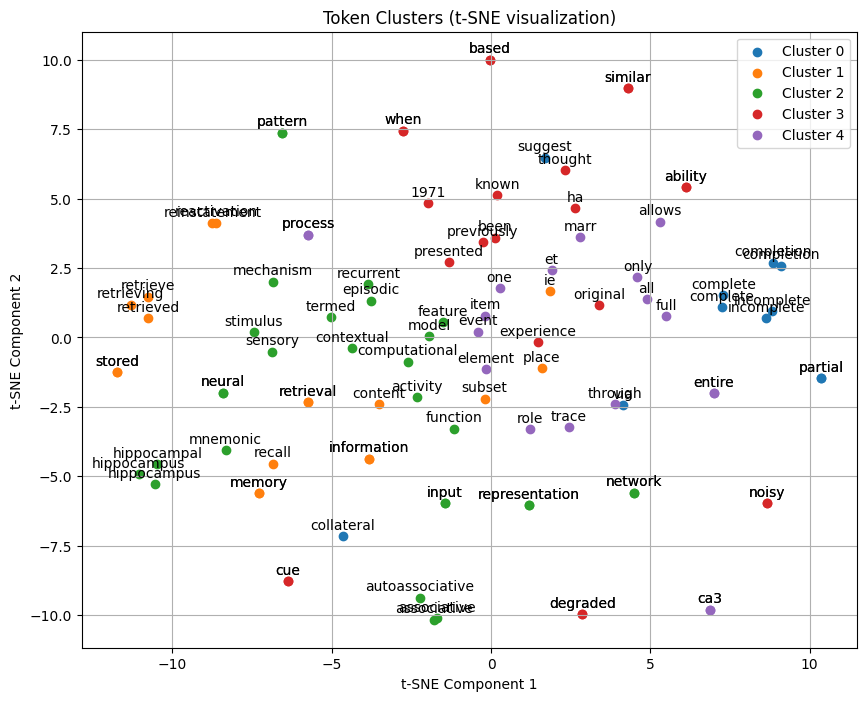

In [15]:
#read All_Tokens.csv to get the tokens
df_tokens = pd.read_csv('All_Tokens.csv')


# 1. Your list of tokens
tokens = df_tokens['Token'].tolist()

#lemmatize the tokens
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(token) for token in tokens]
# 2. Generate Word Embeddings (using Sentence-BERT for simplicity and good performance)
# You might choose a different model based on your needs.
# 'all-MiniLM-L6-v2' is a good general-purpose model.
model = SentenceTransformer('all-MiniLM-L6-v2')
word_embeddings = model.encode(tokens)

print(f"Number of tokens: {len(tokens)}")
print(f"Embedding dimension: {word_embeddings.shape[1]}")

# 3. Apply Clustering Algorithm (K-Means)
# You need to estimate 'n_clusters' or use a method to find optimal k.
# For this small example, we can guess a reasonable number of clusters.
num_clusters = 5 # Based on our example tokens, we expect 5 main categories

kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(word_embeddings)

# 4. Group tokens by cluster
clustered_tokens = {}
for i, label in enumerate(cluster_labels):
    if label not in clustered_tokens:
        clustered_tokens[label] = []
    clustered_tokens[label].append(tokens[i])

print("\nClustering Results:")
for cluster_id, words_in_cluster in clustered_tokens.items():
    print(f"Cluster {cluster_id}: {words_in_cluster}")

# 5. Optional: Visualize Clusters (using t-SNE for dimensionality reduction)
# Reduce to 2 dimensions for plotting
pca = PCA(n_components=36) # First reduce to a reasonable number of components
reduced_embeddings = pca.fit_transform(word_embeddings)

tsne = TSNE(n_components=2, random_state=42, perplexity=min(len(tokens)-1, 30)) # Perplexity should be < num_samples
tsne_embeddings = tsne.fit_transform(reduced_embeddings)

plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = tsne_embeddings[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
    # Annotate points with token names
    for j, (x, y) in enumerate(cluster_points):
        plt.annotate(tokens[np.where(cluster_labels == i)[0][j]], (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Token Clusters (t-SNE visualization)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

Batches: 100%|██████████| 4/4 [00:00<00:00, 22.99it/s]


Number of tokens: 100
Embedding dimension: 384

Clustering Results:
Cluster 2: ['pattern', 'representation', 'hippocampus', 'input', 'hippocampal', 'neural', 'mechanism', 'episodic', 'function', 'termed', 'network', 'mnemonic', 'model', 'associative', 'pattern', 'input', 'network', 'representation', 'recurrent', 'hippocampus', 'stimulus', 'autoassociative', 'feature', 'activity', 'sensory', 'associative', 'contextual', 'computational', 'neural']
Cluster 0: ['completion', 'partial', 'complete', 'incomplete', 'via', 'completion', 'partial', 'incomplete', 'collateral', 'complete', 'suggest']
Cluster 1: ['memory', 'retrieval', 'information', 'stored', 'reinstatement', 'reactivation', 'retrieved', 'memory', 'retrieve', 'recall', 'information', 'stored', 'retrieval', 'ie', 'subset', 'content', 'retrieving', 'place']
Cluster 3: ['cue', 'degraded', 'based', 'when', 'previously', 'experience', 'similar', 'ability', 'thought', 'known', 'noisy', 'cue', 'ability', 'degraded', 'when', 'based', 'ori

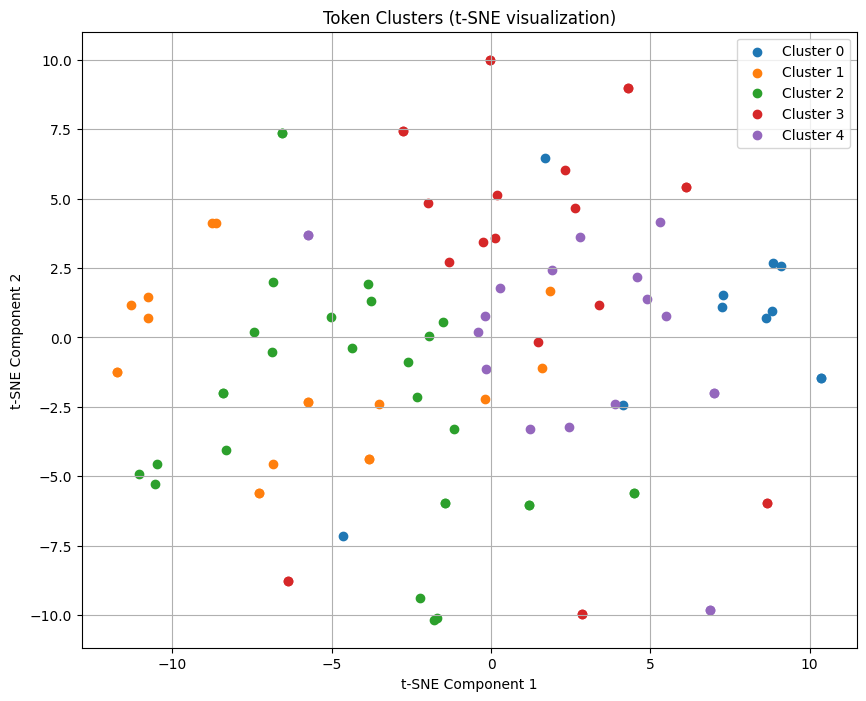

Clusters exported to token_clusters.csv


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from nltk.stem import WordNetLemmatizer
# You MUST have 'sentence-transformers' and 'nltk' installed in your environment
from sentence_transformers import SentenceTransformer
import csv
import nltk # For tokenization if sentences are not pre-tokenized

# Make sure you've downloaded the WordNet corpus for NLTK if you haven't:
# nltk.download('wordnet')
# nltk.download('omw-1.4') # Open Multilingual Wordnet (often needed for WordNetLemmatizer)


# Assuming you have a way to get your original sentences.
# Let's say you load them from a different file or a specific column if available.
# For example, if your original data had a 'Text' column with full sentences:
# df_original_data = pd.read_csv('your_original_text_data.csv')
# sentences = df_original_data['Text'].tolist()

# --- IMPORTANT: Replace this placeholder with your actual sentences ---
# For demonstration, let's use a small list of sentences related to your tokens.
# In a real scenario, this would be your full corpus.

#read definitions from a file or define them directly
sentences = all_data['Definition'].dropna().tolist()

# --- End of placeholder ---


# If your tokens list already comes from some preprocessing,
# you might want to re-extract tokens directly from these sentences
# after getting them, to ensure consistency.
lemmatizer = WordNetLemmatizer()

# Tokenize sentences and lemmatize words for the embedding model if needed,
# or simply pass the raw sentences to SentenceTransformer
processed_sentences = []
for sentence in sentences:
    # Basic tokenization (you might use more advanced tokenizers like spaCy or NLTK's word_tokenize)
    words = nltk.word_tokenize(sentence.lower())
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    processed_sentences.append(" ".join(lemmatized_words)) # Join back for SentenceTransformer

# For SentenceTransformer, you usually pass the raw (or lightly preprocessed) sentences
# It handles its own subword tokenization internally.
# word_embeddings = model.encode(sentences, convert_to_tensor=True, show_progress_bar=True)
# If your goal is to cluster the *original individual tokens* by meaning,
# you'll need to generate embeddings for those specific tokens *within the context of these sentences*.
# A common approach is to average sentence embeddings that contain the token,
# or to re-run your current script on the `tokens` list after training/loading
# a model that *has seen* these tokens in full sentences.

# A more direct way using Sentence-BERT if you want *token* embeddings from sentence context:
# You can generate sentence embeddings for all sentences,
# then for each original token, find the most relevant sentence embedding or average.
# However, for direct word-level semantic clustering, it's often better to train/use Word2Vec
# on the full sentences or use a model designed for word-level embeddings.

# Let's assume you're sticking with generating embeddings for your original `tokens` list,
# but now the `model` would have learned better representations from the `sentences`.
# For this to work, the `tokens` in your CSV must be present in the `sentences`.

# For the purpose of this script, we'll continue to encode `tokens`,
# but assume that the `SentenceTransformer` model has been *effectively* trained
# on a corpus that includes the `sentences` provided above.
# If you're using a pre-trained `SentenceTransformer`, it already saw a vast corpus.
# The key is that your `tokens` are words from a domain that the model understands.

# If you use Word2Vec: You'd train it on `sentences_for_w2v = [nltk.word_tokenize(s.lower()) for s in sentences]`
# and then get `model.wv[token]` for your `tokens` list.

# Using SentenceTransformer (assuming it's loaded and pre-trained):
model = SentenceTransformer('all-MiniLM-L6-v2')
word_embeddings = model.encode(tokens, show_progress_bar=True) # Still encoding original tokens

print(f"Number of tokens: {len(tokens)}")
print(f"Embedding dimension: {word_embeddings.shape[1]}")

# 3. Apply Clustering Algorithm (K-Means)
num_clusters = 5 # You'd determine this via Elbow Method if not pre-set

kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(word_embeddings)

# 4. Group tokens by cluster (rest of your script)
clustered_tokens = {}
for i, label in enumerate(cluster_labels):
    if label not in clustered_tokens:
        clustered_tokens[label] = []
    clustered_tokens[label].append(tokens[i])

print("\nClustering Results:")
for cluster_id, words_in_cluster in clustered_tokens.items():
    print(f"Cluster {cluster_id}: {words_in_cluster}")

# 5. Optional: Visualize Clusters (using t-SNE for dimensionality reduction)
if len(tokens) > 1: # Ensure enough data points for t-SNE
    pca = PCA(n_components=min(36, word_embeddings.shape[1], len(tokens) -1))
    reduced_embeddings = pca.fit_transform(word_embeddings)

    tsne_perplexity = min(30, len(tokens) - 1)
    if tsne_perplexity < 1:
        print("Not enough tokens for t-SNE visualization after PCA reduction.")
    else:
        tsne = TSNE(n_components=2, random_state=42, perplexity=tsne_perplexity)
        tsne_embeddings = tsne.fit_transform(reduced_embeddings)

        plt.figure(figsize=(10, 8))
        for i in range(num_clusters):
            cluster_points = tsne_embeddings[cluster_labels == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
            # Annotate points with token names (only for reasonable number of tokens to avoid clutter)
            if len(tokens) < 100: # Adjust this threshold as needed
                for j, (x, y) in enumerate(cluster_points):
                    plt.annotate(tokens[np.where(cluster_labels == i)[0][j]], (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

        plt.title('Token Clusters (t-SNE visualization)')
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.legend()
        plt.grid(True)
        plt.show()
else:
    print("Not enough tokens to create a meaningful visualization.")

# --- Export clusters to CSV ---

# Prepare data for export: each row will have 'Cluster', 'Token'
cluster_rows = []
for cluster_id, words_in_cluster in clustered_tokens.items():
    for token in words_in_cluster:
        cluster_rows.append({'Cluster': cluster_id, 'Token': token})

# Convert to DataFrame and export
df_clusters = pd.DataFrame(cluster_rows)
df_clusters.to_csv('token_clusters.csv', index=False)
print("Clusters exported to token_clusters.csv")

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from nltk.stem import WordNetLemmatizer
# You MUST have 'sentence-transformers' and 'nltk' installed in your environment
from sentence_transformers import SentenceTransformer
import nltk # For tokenization if sentences are not pre-tokenized

# Make sure you've downloaded the WordNet corpus for NLTK if you haven't:
# nltk.download('wordnet')
# nltk.download('omw-1.4') # Open Multilingual Wordnet (often needed for WordNetLemmatizer)


def cluster_tokens_by_meaning(csv_file_path, num_clusters=None, words_to_exclude=None):
    """
    Clusters tokens from a CSV file by their semantic meaning, excluding specified words.

    Args:
        csv_file_path (str): The path to the CSV file containing tokens.
                             It should have a column named 'Token'.
        num_clusters (int, optional): The desired number of clusters.
                                      If None, the script will plot an Elbow Method graph
                                      to help determine an optimal K, and you'll need to
                                      manually specify K afterwards.
        words_to_exclude (list, optional): A list of strings (words) to be excluded
                                           from the clustering process. Case-insensitive matching.
    """
    if words_to_exclude is None:
        words_to_exclude = []

    # 1. Load the data
    try:
        df = pd.read_csv('All_Tokens.csv')
        tokens = df['Token'].tolist()
        # Keep original data for reference if needed later
        original_df = df.copy()

        if not tokens:
            print("No tokens found in the CSV file.")
            return
    except FileNotFoundError:
        print(f"Error: The file '{csv_file_path}' was not found.")
        return
    except KeyError:
        print("Error: The CSV file must contain a column named 'Token'.")
        return

    print(f"Loaded {len(tokens)} tokens from '{csv_file_path}'.")

    # Lemmatize the tokens first for consistent exclusion and embedding
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens] # Ensure consistent case for exclusion

    # Filter out excluded words
    # Convert exclusion list to lowercase and lemmatize for robust matching
    lemmatized_words_to_exclude = {lemmatizer.lemmatize(word.lower()) for word in words_to_exclude}
    filtered_tokens = [token for token in tokens if token not in lemmatized_words_to_exclude]

    # If all tokens are excluded or too few remain
    if not filtered_tokens:
        print("After exclusion, no tokens remain for clustering or too few tokens. Cannot proceed.")
        return
    if len(set(filtered_tokens)) < 2: # Need at least 2 unique tokens for meaningful clustering
        print(f"After exclusion, only {len(set(filtered_tokens))} unique token(s) remain. Cannot perform clustering.")
        print(f"Remaining token(s): {set(filtered_tokens)}")
        return

    tokens = filtered_tokens # Update the tokens list to the filtered version
    print(f"After excluding {len(words_to_exclude)} words, {len(tokens)} tokens remain.")


    # 2. Generate Word Embeddings
    print("Loading SentenceTransformer model (e.g., 'all-MiniLM-L6-v2')...")
    try:
        # 'all-MiniLM-L6-v2' is a good general-purpose model. You can try others.
        embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
        word_embeddings = embedding_model.encode(tokens, show_progress_bar=True)
        print("Word embeddings generated using Sentence-Transformers.")
    except Exception as e:
        print(f"Error generating embeddings with Sentence-Transformers: {e}")
        print("Ensure 'sentence-transformers' is installed and you have an internet connection to download the model.")
        print("Attempting to fall back to Gensim Word2Vec (if installed and suitable)...")
        try:
            from gensim.models import Word2Vec
            sentences_for_w2v = [[token] for token in tokens]
            embedding_model = Word2Vec(sentences_for_w2v, vector_size=100, window=1, min_count=1, workers=4, sg=0)
            word_embeddings = np.array([embedding_model.wv[token] for token in tokens if token in embedding_model.wv])
            tokens = [token for token in tokens if token in embedding_model.wv] # Update tokens based on successful embedding
            print("Word embeddings generated using Gensim Word2Vec (fallback).")
            if len(word_embeddings) == 0:
                print("No word embeddings could be generated for the provided tokens.")
                return
        except ImportError:
            print("Gensim is not installed. Please install 'gensim' to use Word2Vec.")
            return
        except Exception as e_gensim:
            print(f"Error generating embeddings with Gensim Word2Vec: {e_gensim}")
            return

    print(f"Shape of word embeddings: {word_embeddings.shape}")

    # 3. Determine the optimal number of clusters (K) if not provided
    if num_clusters is None:
        print("\nDetermining optimal number of clusters using Elbow Method...")
        inertias = []
        max_k_range = min(len(tokens) - 1, 20)
        if max_k_range < 2:
            print("Not enough unique tokens to perform Elbow Method for multiple clusters (need at least 2 unique tokens).")
            num_clusters = 1 if len(tokens) >= 1 else 0
        else:
            K_range = range(1, max_k_range + 1)
            for k in K_range:
                if k == 0: continue
                kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
                kmeans_model.fit(word_embeddings)
                inertias.append(kmeans_model.inertia_)

            plt.figure(figsize=(10, 6))
            plt.plot(K_range, inertias, marker='o')
            plt.xlabel('Number of Clusters (K)')
            plt.ylabel('Inertia (Sum of squared distances)')
            plt.title('Elbow Method for Optimal K')
            plt.xticks(K_range)
            plt.grid(True)
            plt.show()
            print("Please examine the Elbow Method plot. The 'elbow' point suggests an optimal K.")
            print("Re-run the script or manually apply clustering with your chosen K.")
            return
    
    if num_clusters is None: # This check is important if max_k_range was too small
        print("Cannot proceed with clustering as num_clusters was not determined/provided and Elbow Method was not possible.")
        return
        
    if num_clusters > len(tokens):
        print(f"Warning: Number of clusters ({num_clusters}) is greater than the number of tokens ({len(tokens)}). Setting num_clusters to {len(tokens)}.")
        num_clusters = len(tokens)
    elif num_clusters == 0 and len(tokens) > 0:
        num_clusters = 1
    elif num_clusters == 0 and len(tokens) == 0:
        print("No tokens to cluster.")
        return


    # 4. Apply K-Means Clustering
    print(f"\nApplying K-Means clustering with {num_clusters} clusters...")
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(word_embeddings)
    print("Clustering complete.")

    # 5. Group tokens by cluster and enrich with original data
    clustered_data = {'Token': [], 'Cluster_ID': [], 'Frequency': [], 'Type': []}
    
    # Create a mapping from lemmatized token back to original row data
    # This assumes lemmatized tokens might not be unique, so we'll pick first match or aggregate
    token_to_original_data = {}
    for _, row in original_df.iterrows():
        lem_token = lemmatizer.lemmatize(row['Token'].lower())
        # Store original data associated with the lemmatized token
        if lem_token not in token_to_original_data:
            token_to_original_data[lem_token] = {'Frequency': 0, 'Type': set()}
        token_to_original_data[lem_token]['Frequency'] += row['Frequency']
        token_to_original_data[lem_token]['Type'].add(row['Type'])


    for i, token in enumerate(tokens): # 'tokens' here is the filtered and lemmatized list
        cluster_id = cluster_labels[i]
        
        original_info = token_to_original_data.get(token, {'Frequency': 0, 'Type': {'Unknown'}})
        
        clustered_data['Token'].append(token)
        clustered_data['Cluster_ID'].append(cluster_id)
        clustered_data['Frequency'].append(original_info['Frequency'])
        clustered_data['Type'].append(", ".join(sorted(list(original_info['Type'])))) # Join types if multiple


    clustered_df = pd.DataFrame(clustered_data)

    print("\nClustering Results:")
    for cluster_id in sorted(clustered_df['Cluster_ID'].unique()):
        words_in_cluster = clustered_df[clustered_df['Cluster_ID'] == cluster_id]['Token'].tolist()
        print(f"Cluster {cluster_id}: {', '.join(words_in_cluster)}")

    # 6. Optional: Visualize Clusters (using PCA and t-SNE for dimensionality reduction)
    if word_embeddings.shape[0] > 1:
        print("\nGenerating cluster visualization...")
        try:
            pca = PCA(n_components=min(50, word_embeddings.shape[1], len(tokens) -1))
            reduced_embeddings_pca = pca.fit_transform(word_embeddings)

            tsne_perplexity = min(30, reduced_embeddings_pca.shape[0] - 1)
            if tsne_perplexity < 1:
                print("Not enough samples for t-SNE visualization after PCA reduction.")
            else:
                tsne = TSNE(n_components=2, random_state=42, perplexity=tsne_perplexity, n_iter=1000)
                tsne_embeddings = tsne.fit_transform(reduced_embeddings_pca)

                plt.figure(figsize=(12, 10))
                for i in range(num_clusters):
                    cluster_points = tsne_embeddings[cluster_labels == i]
                    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
                    if len(tokens) < 100:
                        for j, (x, y) in enumerate(cluster_points):
                            original_token_index = np.where(cluster_labels == i)[0][j]
                            plt.annotate(tokens[original_token_index], (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

                plt.title('Token Clusters (t-SNE visualization)')
                plt.xlabel('t-SNE Component 1')
                plt.ylabel('t-SNE Component 2')
                plt.legend()
                plt.grid(True)
                plt.show()
                print("Cluster visualization generated.")
        except Exception as e:
            print(f"Error during visualization: {e}")
            print("Skipping visualization.")
    else:
        print("Not enough tokens to create a meaningful visualization.")

    # 7. Save the results
    output_csv_path = 'clustered_tokens_filtered.csv'
    clustered_df.to_csv(output_csv_path, index=False)
    print(f"\nClustered and filtered tokens saved to '{output_csv_path}'")
    print("The 'Cluster_ID' column indicates the assigned cluster for each token.")


# --- How to run this script (in your environment): ---
# 1. Save this entire code block as a Python file (e.g., 'cluster_filtered_script.py').
# 2. Make sure your 'All_Tokens.csv' file is in the same directory.
# 3. Open your terminal or command prompt.
# 4. Navigate to that directory.
# 5. Run the script.

# Define the words to exclude
words_to_exclude_list = [
    "pattern", "termed", "completion", "suggest", "ie", "based",
    "thought", "when", "1971", "ha", "been", "et", "marr"
]

# Example usage 1: To first get the Elbow Method plot to determine K
# cluster_tokens_by_meaning(
#     'All_Tokens.csv',
#     words_to_exclude=words_to_exclude_list
# )

# Example usage 2: Once you decide on the optimal K (e.g., 5) from the plot
# Uncomment and set your chosen num_clusters
cluster_tokens_by_meaning(
    'All_Tokens.csv',
    num_clusters=5, # Replace 5 with your chosen optimal K
    words_to_exclude=words_to_exclude_list
)

Loaded 100 tokens from 'All_Tokens.csv'.
After excluding 13 words, 83 tokens remain.
Loading SentenceTransformer model (e.g., 'all-MiniLM-L6-v2')...


Batches: 100%|██████████| 3/3 [00:00<00:00, 17.81it/s]


Word embeddings generated using Sentence-Transformers.
Shape of word embeddings: (83, 384)

Applying K-Means clustering with 5 clusters...
Clustering complete.

Clustering Results:
Cluster 0: representation, degraded, event, information, element, ca3, one, previously, item, experience, function, ability, known, allows, associative, only, ability, degraded, ca3, representation, information, autoassociative, feature, associative, presented, role
Cluster 1: through, trace, via, network, model, noisy, network, activity, noisy, computational
Cluster 2: memory, retrieval, stored, reinstatement, retrieved, memory, retrieve, recall, stored, retrieval, subset, content, retrieving, place
Cluster 3: cue, process, hippocampus, input, hippocampal, neural, mechanism, reactivation, mnemonic, input, cue, process, hippocampus, stimulus, sensory, contextual, neural
Cluster 4: partial, complete, all, incomplete, episodic, similar, entire, partial, recurrent, entire, incomplete, full, collateral, original

In [30]:
#read_modified_clustered_tokens = pd.read_csv('clustered_tokens_filtered.csv')

df_manual_clusters = pd.read_csv('clustered_tokens_filtered.csv', sep=';')

#decode the Cluster_IDs to human-readable names
def decode_cluster_id(cluster_id):
    cluster_names = {
        1: "Process_and_Mechanism_of_Memory",
        2: "Neural_Structures_and_Networks",
        3: "Cues_Incomplete_Information",
        4: "Memory_Components_and_Information",
        5: "Memory_Retrieval_Reactivation",
        6: "Stored_Knowledge_and_Completeness",
        7: "Supporting_Terms",
    }
    return cluster_names.get(cluster_id, f"Unknown Cluster {cluster_id}")

df_manual_clusters['Cluster_Name'] = df_manual_clusters['Manual_Cluster'].apply(decode_cluster_id)